In [1]:
#Importation des modules nécessaires au notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
import geopandas as gpd

In [ ]:
!pip install --upgrade xlrd
!pip install geopandas

In [ ]:
!pip install plotnine

In [2]:
#Collecte de données sur le revenu moyen par département
#Importation de la base de données
path = 'Bases de données/revenus.csv'
df = pd.read_csv(path, sep = ';')

#Petit nettoyage
rename = {'CodePostal' : 'Code postal',' Niveau de Vie Commune ':'Niveau de vie commune', ' NiveaudevieDépartement ':'Niveau de vie département', 'Departement' : 'Département'}
df = df.rename(rename, axis= 1)
df['Code postal'] = df['Code postal'].astype(str)

#Ajout d'une colonne 'Departement' en extrayant les deux premiers caractères du code postal
df['Département'] = df['Code postal'].str[:-3]

#Conversion de la colonne 'Revenu' et 'Département' en type numérique
df['Niveau de vie département'] = df['Niveau de vie département'].apply(lambda x: x.replace(' ', ''))
df['Niveau de vie département'] = pd.to_numeric(df['Niveau de vie département'])

def tonum(x):
    try :
        return(int(x))
    except ValueError :
        return(x)

df['Département'] = df['Département'].apply(tonum)

#Isolation des département et de leur revenu moyen
dfrevdep = df[['Département', 'Niveau de vie département']].copy()

#Conservation d'une ligne par département
dfrevdep = dfrevdep.drop_duplicates(subset='Département')

# Réinitialisation de l'index
dfrevdep.reset_index(drop=True, inplace=True)

   Département  Niveau de vie département
0            1                      22344
1            2                      18111
2            3                      18829
3            4                      19008
4            5                      19203
..         ...                        ...
91          93                      17192
92          94                      22314
93          95                      21296
94          2A                      19525
95          2B                      18016

[96 rows x 2 columns]


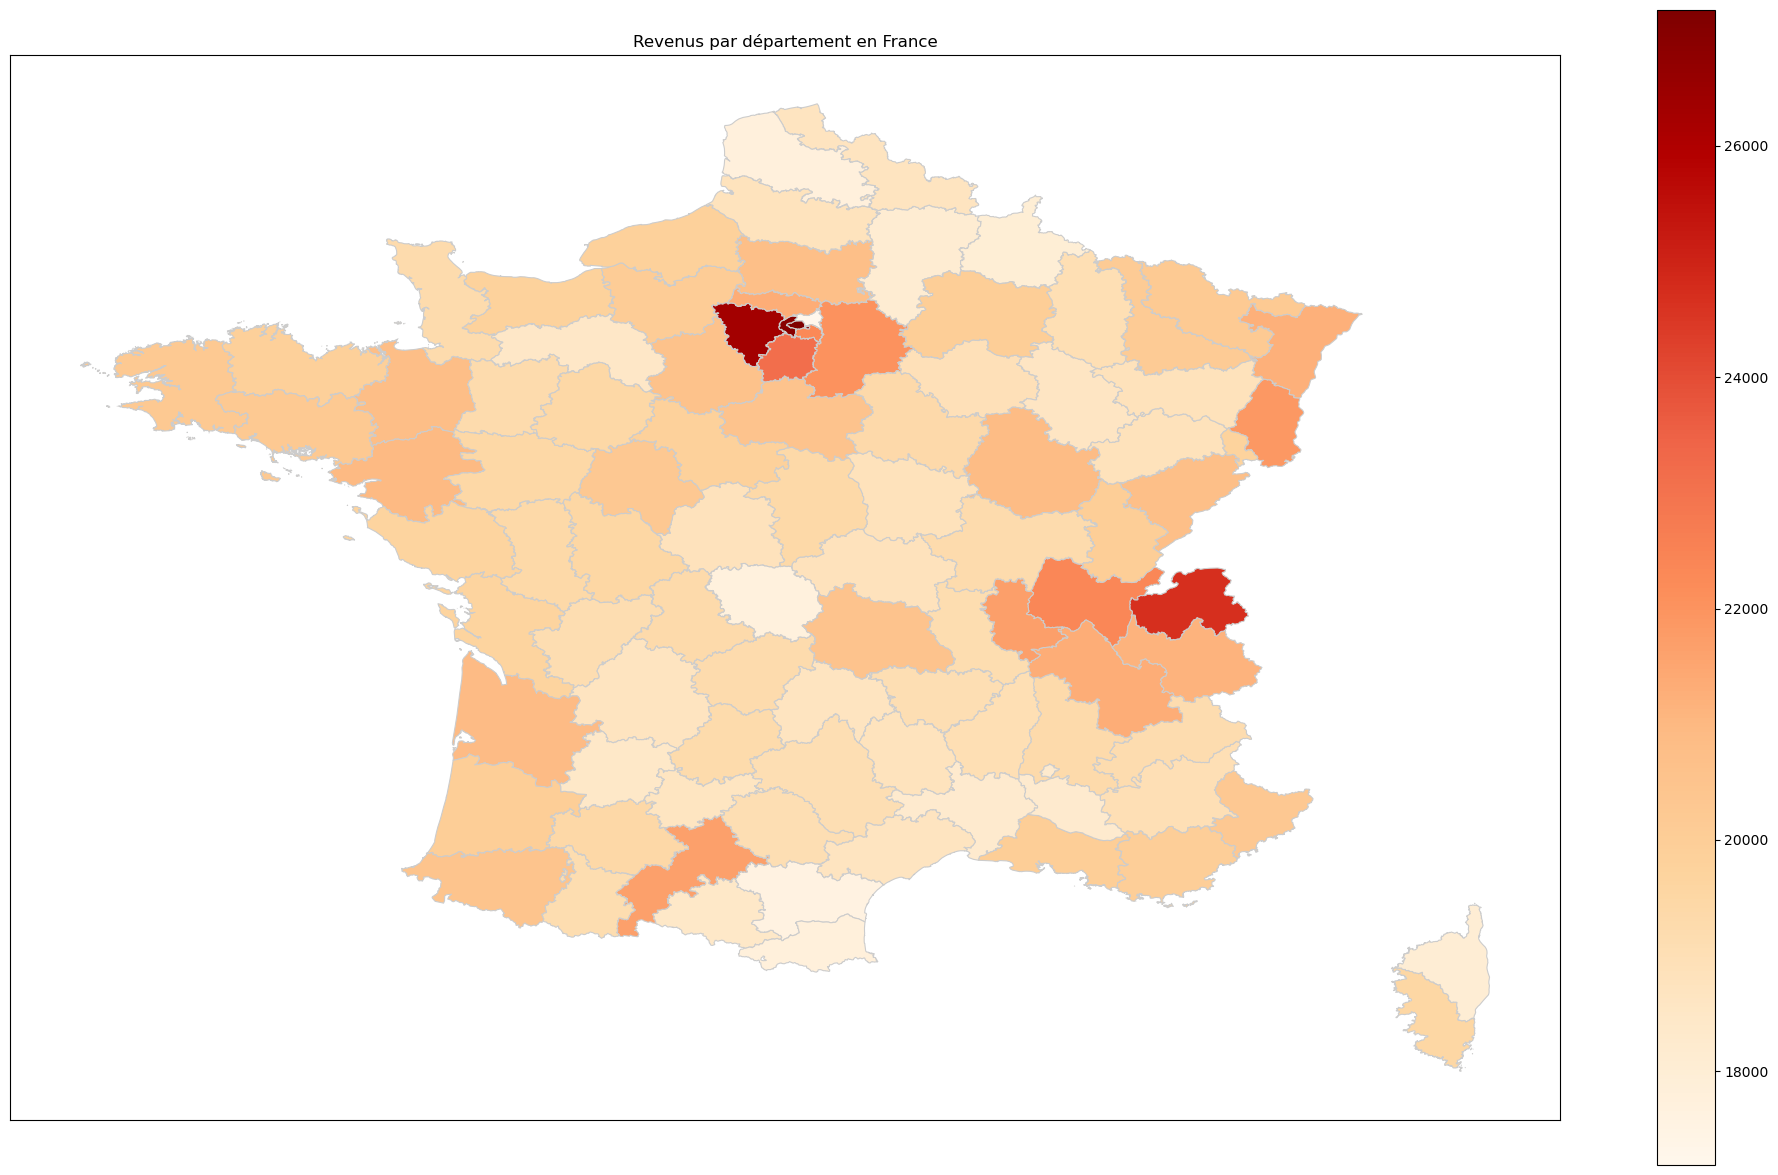

In [38]:
#Création d'une carte de représentation du revenu moyen par département en France métropolitaine
#Importation du fichier shapefile des départements français
path = 'Bases de données/departements-20140306-100m-shp/departements-20140306-100m.shp'
map_df = gpd.read_file(path)

#Petit nettoyage
map_df['code_insee'] = map_df['code_insee'].apply(tonum)
map_df.drop('wikipedia', axis=1, inplace=True)

#Fusion du DataFrame des revenus avec le GeoDataFrame des départements
map_df = map_df.join(dfrevdep.set_index('Département'), on='code_insee', how='left')

# Création une figure et des axes pour la carte
fig, ax = plt.subplots(1, 1, figsize=(25, 15))

#Invisibilisation des axes
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.grid(True)

#Formation de la carte en utilisant les revenus pour la coloration
map_df.plot(column='Niveau de vie département', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajout d'un titre
plt.title('Revenus par département en France')

#Affichage de la carte
plt.show()

In [40]:
#Création d'un DataFrame qui lie chaque commune française à son département
#Sélection des colonnes d'intérêt
dfvilledep = df[['Département', 'Nom Commune']].copy()

#Réinitialisation de l'index
dfvilledep.reset_index(drop=True, inplace=True)

#Suppresion de la distinction par arrondissement pour Paris, Lyon, et Marseille
Paris = ['Paris 1er Arrondissement',
         'Paris 2e Arrondissement',
         'Paris 3e Arrondissement',
         'Paris 4e Arrondissement',
         'Paris 5e Arrondissement',
         'Paris 6e Arrondissement',
         'Paris 7e Arrondissement',
         'Paris 8e Arrondissement',
         'Paris 9e Arrondissement',
         'Paris 10e Arrondissement',
         'Paris 11e Arrondissement',
         'Paris 12e Arrondissement',
         'Paris 13e Arrondissement',
         'Paris 14e Arrondissement',
         'Paris 15e Arrondissement',
         'Paris 16e Arrondissement',
         'Paris 17e Arrondissement',
         'Paris 18e Arrondissement',
         'Paris 19e Arrondissement',
         'Paris 20e Arrondissement'
        ]
Lyon = ['Lyon 1er Arrondissement',
        'Lyon 2e Arrondissement',
        'Lyon 3e Arrondissement',
        'Lyon 4e Arrondissement',
        'Lyon 5e Arrondissement',
        'Lyon 6e Arrondissement',
        'Lyon 7e Arrondissement',
        'Lyon 8e Arrondissement',
        'Lyon 9e Arrondissement'
       ]
Marseille = ['Marseille 1er Arrondissement',
             'Marseille 2e Arrondissement',
             'Marseille 3e Arrondissement',
             'Marseille 4e Arrondissement',
             'Marseille 5e Arrondissement',
             'Marseille 6e Arrondissement',
             'Marseille 7e Arrondissement',
             'Marseille 8e Arrondissement',
             'Marseille 9e Arrondissement',
             'Marseille 10e Arrondissement',
             'Marseille 11e Arrondissement',
             'Marseille 12e Arrondissement',
             'Marseille 13e Arrondissement',
             'Marseille 14e Arrondissement',
             'Marseille 15e Arrondissement',
             'Marseille 16e Arrondissement'
            ]
def arrondtoville(x) :
    if x in Lyon :
        return 'Lyon'
    elif x in Marseille :
        return 'Marseille'
    elif x in Paris :
        return 'Paris'
    else :
        return(x)

dfvilledep['Nom Commune'] = dfvilledep['Nom Commune'].apply(arrondtoville)
dfvilledep.drop_duplicates(subset='Nom Commune', inplace=True)

# Affichage du DataFrame obtenu
dfvilledep

,Département,Nom Commune
0,1,L'Abergement-Clémenciat
1,1,L'Abergement-de-Varey
2,1,Ambérieu-en-Bugey
3,1,Ambérieux-en-Dombes
4,1,Ambléon
...,...,...
36567,2B,Zalana
36568,2B,Zilia
36569,2B,Zuani
36570,2B,San-Gavino-di-Fiumorbo


In [60]:
#Création d'un DataFrame des résultats de votes à coloration écologiste

#Importation de la base de données des votes par département
path ='Bases de données/votes.csv'
df2= pd.read_csv(path, sep=';')

#Suppression des colonnes vides
df2 = df2.dropna(axis=1, how='all')

# Suppression de quelques colonnes
colonnes_a_supprimer = ['Inscrits', 'Abstentions', '% Abs/Ins','Votants','% Vot/Ins', 'Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Sièges','% Voix/Ins','% Voix/Exp']
df2 = df2.drop(columns=colonnes_a_supprimer)

#Création du DataFrame des votes par département pour le parti écologiste aux législatives 2022
diccolumns1 = {'Nbvoix1' : 'Nbvoix', '%popent1' :'%popent', '%popvot1':'%popvot'}
diccolumns2 = {'Nbvoix2' : 'Nbvoix', '%popent2' :'%popent', '%popvot2':'%popvot'}
diccolumns3 = {'Nbvoix3' : 'Nbvoix', '%popent3' :'%popent', '%popvot3':'%popvot'}
diccolumns4 = {'Nbvoix4' : 'Nbvoix', '%popent4' :'%popent', '%popvot4':'%popvot'}

dféco1 = df2[['Code du département', 'Libellé du département', 'Nbvoix1', '%popent1', '%popvot1']].where(df2['Parti1']=='ECO').dropna()
dféco1 = dféco1.rename(diccolumns1, axis=1)
dféco2 = df2[['Code du département', 'Libellé du département', 'Nbvoix2', '%popent2', '%popvot2']].where(df2['Parti2']=='ECO').dropna()
dféco2 = dféco2.rename(diccolumns2, axis=1)
dféco3 = df2[['Code du département', 'Libellé du département', 'Nbvoix3', '%popent3', '%popvot3']].where(df2['Parti3']=='ECO').dropna()
dféco3 = dféco3.rename(diccolumns3, axis=1)
dféco4 = df2[['Code du département', 'Libellé du département', 'Nbvoix4', '%popent4', '%popvot4']].where(df2['Parti4']=='ECO').dropna()
dféco4 = dféco4.rename(diccolumns4, axis=1)

dféco = pd.concat([dféco1, dféco2, dféco3, dféco4], axis=0)
dféco.sort_values('Code du département', inplace=True)

#Création du DataFrame des votes par département pour la NUPES aux législatives 2022
dfnupes1 = df2[['Code du département', 'Libellé du département', 'Nbvoix1', '%popent1', '%popvot1']].where(df2['Parti1']=='NUP').dropna()
dfnupes1 = dfnupes1.rename(diccolumns1, axis=1)
dfnupes2 = df2[['Code du département', 'Libellé du département', 'Nbvoix2', '%popent2', '%popvot2']].where(df2['Parti2']=='NUP').dropna()
dfnupes2 = dfnupes2.rename(diccolumns2, axis=1)

dfnupes = pd.concat([dfnupes1,dfnupes2], axis=0)
dfnupes.sort_values('Code du département', inplace=True)

#Suppression des lignes d'informations sur départements non métropolitains
dféco.drop(index= [96, 97, 99, 102, 104, 106], inplace=True)
dfnupes.drop(index=106, inplace=True)

#Compilation des votes
dféconupes = pd.DataFrame()

dféconupes[['Code du département', 'Libellé du département']] = dfnupes[['Code du département', 'Libellé du département']]
dféconupes['Nbvoix'] = dféco['Nbvoix'] + dfnupes['Nbvoix']
dféconupes['%popent'] = dféco['%popent'] + dfnupes['%popent']
dféconupes['%popvot'] = dféco['%popvot'] + dfnupes['%popvot']

#Affichage du DataFrame
dféconupes

,Code du département,Libellé du département,Nbvoix,%popent,%popvot
0,01,Ain,51895.0,11.78,25.04
1,02,Aisne,41356.0,11.05,24.61
2,03,Allier,32573.0,13.00,26.28
3,04,Alpes-de-Haute-Provence,21558.0,16.76,33.08
4,05,Hautes-Alpes,18685.0,16.40,31.71
...,...,...,...,...,...
91,91,Essonne,132255.0,16.44,35.12
92,92,Hauts-de-Seine,165750.0,16.51,31.63
93,93,Seine-Saint-Denis,148000.0,18.49,48.64
94,94,Val-de-Marne,150867.0,18.80,40.26


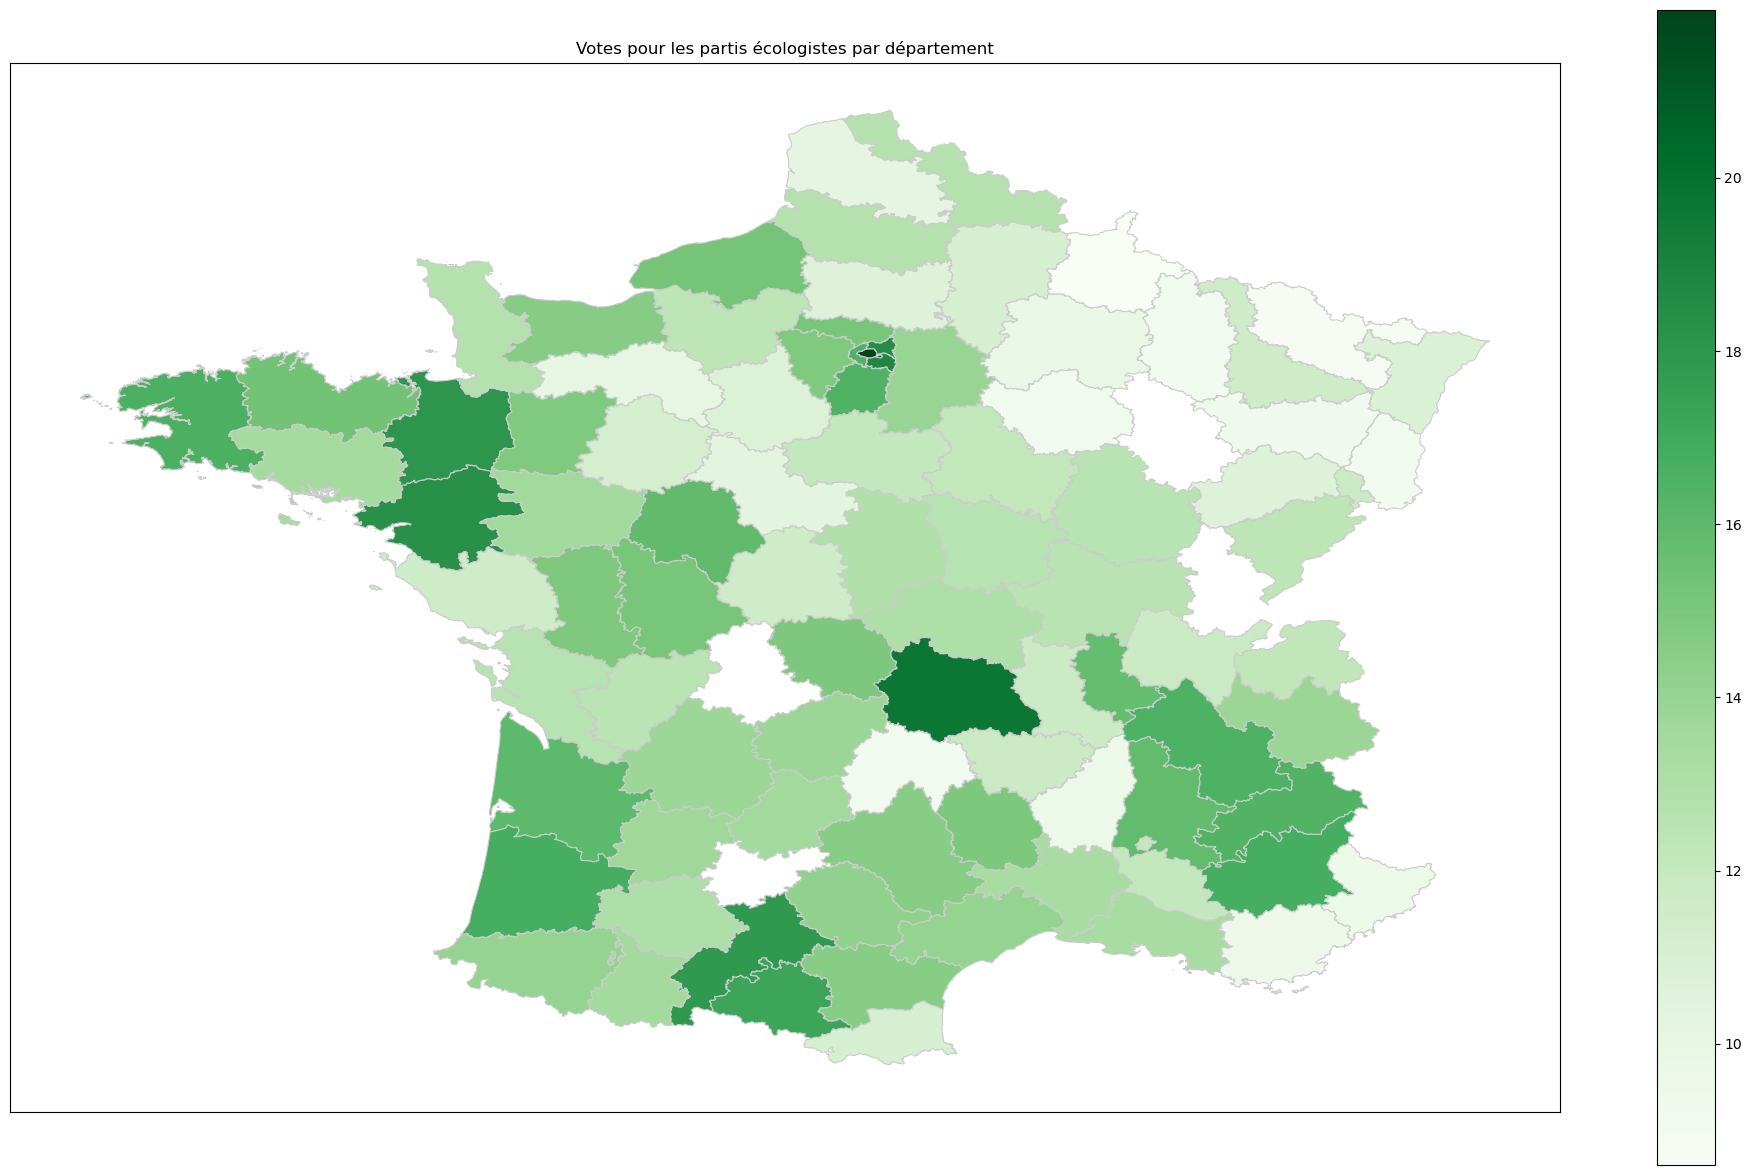

In [53]:
#Création d'une carte de représentation de la coloration écologiste par département en France métropolitaine

#Petit nettoyage
dféconupes['Code du département'] = pd.to_numeric(dféconupes['Code du département'])

#Importation du fichier shapefile des départements français
path = 'Bases de données/departements-20140306-100m-shp/departements-20140306-100m.shp'
map_df2 = gpd.read_file(path)

#Petit nettoyage
map_df2['code_insee'] = map_df['code_insee'].apply(tonum)
map_df2.drop('wikipedia', axis=1, inplace=True)


#Fusion du DataFrame des résultats de votes avec le GeoDataFrame des départements
map_df2 = map_df2.join(dféconupes.set_index('Code du département'), on='code_insee', how='left')


# Création une figure et des axes pour la carte
fig, ax = plt.subplots(1, 1, figsize=(25, 15))

#Invisibilisation des axes
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.grid(True)

#Formation de la carte en utilisant les résulats de votes pour la coloration
map_df2.plot(column='%popent', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajout d'un titre
plt.title('Votes pour les partis écologistes par département')

#Affichage de la carte
plt.show()

In [55]:
# Mise en commun des données des annonces, des votes et du revenu moyen par département

#Importation des données scrappées
dfjeanshommes = pd.read_csv('Bases de données/jeanshomme.csv')

#Petit nettoyage
dfjeanshommes.drop('Unnamed: 0', axis=1, inplace=True)

#Préparation à la jointure avec les autres bases de données sur le nom des communes
dfjeanshommes['Localisation'] = dfjeanshommes['Localisation'].apply(lambda x: x[:-8])
def nantransfo(x) :
    if x=='' :
        return float('nan')
    else :
        return(x)
dfjeanshommes['Localisation'] = dfjeanshommes['Localisation'].apply(nantransfo)
dfjeanshommes = dfjeanshommes.dropna(subset='Localisation')

#Jointure sur le noms des villes pour associer chaque ville à son département
df3 = dfjeanshommes.join(dfvilledep.set_index('Nom Commune'), on='Localisation', how='left')

#Petit nettoyage
df3.reset_index(inplace=True)
df3.drop_duplicates(subset='index', inplace=True)
df3.drop('index', axis=1, inplace=True)
df3['Prix (€)'] = df3['Prix (€)'].apply(lambda x: x.replace(',', '.'))
df3['Prix (€)'] = pd.to_numeric(df3['Prix (€)'])

#Jointure sur le code postal des département pour leurs résultats de votes
df3 = df3.join(dféconupes.set_index('Code du département'), on = 'Département', how = 'left')

#Importation des données de revenus par département
path = 'Bases de données/revenus.csv'
dfrev = pd.read_csv(path, sep = ';')

#Petit nettoyage
rename = {'CodePostal' : 'Code postal', ' Niveau de vie Commune ':'Niveau de vie commune', ' NiveaudevieDépartement ':'Niveau de vie département', 'Departement' : 'Département'}
dfrev = dfrev.rename(rename, axis= 1)

#Suppression des colonnes non intéressantes pour la jointure
dfrev.drop(['Code postal', 'Niveau de vie département'], axis=1, inplace=True)
dfrev.set_index('Nom Commune', inplace=True)

#Jointure avec le revenu moyen par département et petit nettoyage
dfjointe = df3.join(dfrev, on='Localisation', how='left')

dfjointe.reset_index(inplace=True)
dfjointe.drop_duplicates(subset='index', inplace=True)
dfjointe.set_index('index', inplace=True)

#Exportation de la base de données jointes pour la modélisation
dfjointe.to_csv('donnéesjointes.csv')

In [59]:
#Préparation des données à une première visualisation
#Description du prix par département
dfdesc = df3[['Libellé du département', 'Prix (€)']].groupby('Libellé du département').describe()
dfdesc = dfdesc.transpose().reset_index(level=0, drop=True)
dfdesc = dfdesc.transpose()

#Jointure avec les résultats de votes écologistes par département
dfdesc = dfdesc.join(dféconupes.set_index('Libellé du département'), how='left')

#Exportation en vue de la visualisation
dfdesc.to_csv('desc.csv')